In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
#import tensorflow_hub as hub
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
WorkingDir = 'F:/Preprocessed/'
TestFrames1DIR = WorkingDir + 'TestFrames1.2/'
TestFrames2DIR = WorkingDir + 'TestFrames2.2/'
TestFrames3DIR = WorkingDir + 'TestFrames3.2/'
TrainFrames1DIR = WorkingDir + 'TrainFrames1.2/'
TrainFrames2DIR = WorkingDir + 'TestFrames2.2/'
TrainFrames3DIR = WorkingDir + 'TestFrames3.2/'
os.chdir(WorkingDir)

CATEGORIES = ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching',
              'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress', 'Biking', 'Billiards', 'BlowDryHair',
              'BlowingCandles', 'BodyWeightSquats', 'Bowling', 'BoxingPunchingBag', 'BoxingSpeedBag', 'Breaststroke',
              'BrushingTeeth', 'CleanandJerk', 'CliffDiving', 'CricketBowling', 'CricketShot', 'CuttingInKitchen',
              'Diving', 'Drumming', 'Fencing', 'FieldHockeyPenalty', 'FloorGymnastics', 'FrisbeeCatch', 'FrontCrawl',
              'GolfSwing', 'Haircut', 'HammerThrow', 'Hammering', 'HandstandPushups', 'HandstandWalking',
              'HeadMassage', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'IceDancing', 'JavelinThrow',
              'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking', 'Knitting', 'LongJump', 'Lunges',
              'MilitaryParade', 'Mixing', 'MoppingFloor', 'Nunchucks', 'ParallelBars', 'PizzaTossing',
              'PlayingGuitar', 'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PlayingCello', 'PlayingDaf',
              'PlayingDhol', 'PlayingFlute', 'PlayingSitar', 'PoleVault', 'PommelHorse', 'PullUps', 'Punch',
              'PushUps', 'Rafting', 'RockClimbingIndoor', 'RopeClimbing', 'Rowing', 'SalsaSpin', 'ShavingBeard',
              'Shotput', 'SkateBoarding', 'Skiing', 'Skijet', 'SkyDiving', 'SoccerJuggling', 'SoccerPenalty',
              'StillRings', 'SumoWrestling', 'Surfing', 'Swing', 'TableTennisShot', 'TaiChi', 'TennisSwing',
              'ThrowDiscus', 'TrampolineJumping', 'Typing', 'UnevenBars', 'VolleyballSpiking', 'WalkingWithDog',
              'WallPushups', 'WritingOnBoard', 'YoYo']


In [3]:
#param image           # pass the method an image in 3D array format (height-width-color)
#param pixel_threshold # how many pixels of a line should be [0, 0, 0] to count the line as 'blank'?
#param line_threshold  # how many lines of the image should be 'blank' to flag the image?

def check_for_blank(image, path='', pixel_threshold=200, line_threshold=5):   
    lines = 0
    for line in image:
        count = 0
        for pixel in line:
            if np.all(pixel == 0): # if a pixel is [0, 0, 0]
                count += 1 # count it
        if count >= pixel_threshold: # if there are at least 200 in a line
            lines += 1 #count the line
        if lines >= line_threshold:
            print(path + ' has blank lines')
            return True

In [ ]:
# prints list of which images have mostly blank lines

for dataset in os.listdir(WorkingDir):
    print(dataset)
    cat_num = 0    
    for category in CATEGORIES:
        pathCat = os.path.join(dataset, category)
        pathVid = './' + dataset + '/' + str(category)

        print( str(cat_num) + ': ' + category )
        for video in os.listdir(pathVid):
            pathImg = pathVid + '/' + str(video)

            for img in os.listdir(pathImg):
                img_array = cv2.imread(pathImg + '/' + img)
                check_for_blank(img_array, pathImg)
                # only get one image per video
                break

        cat_num += 1
        print('done with ' + category)
        if cat_num > 6:
            break

In [5]:
# checks

def frame_from_videos(directory, max_categories=101): # by default uses all categories
    cat_num = 0
    
    for category in CATEGORIES:
        if(cat_num >= max_categories):
            break
        pathCat = os.path.join(directory, category)
        pathVid = directory + str(category)

        print( str(cat_num) + ': ' + category )
        for video in os.listdir(pathVid):
            pathImg = pathVid + '/' + str(video)
            
            for img in os.listdir(pathImg):
                img_array = cv2.imread(pathImg + '/' + img)
                check_for_blank(img_array, pathImg)
                # only get one image per video
                break
            
            
        cat_num += 1
    print('done')

In [ ]:
frame_from_videos(TestFrames1DIR, 6)

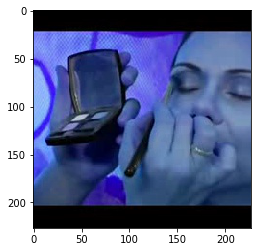

True

video F:/Preprocessed/TestFrames1.2/ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi/Frame0.jpg has blank lines


In [7]:
image_path = WorkingDir + 'TestFrames1.2/ApplyEyeMakeup/v_ApplyEyeMakeup_g02_c02.avi/Frame0.jpg'
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()
check_for_blank(image, image_path)